In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
len(iris.data)

150

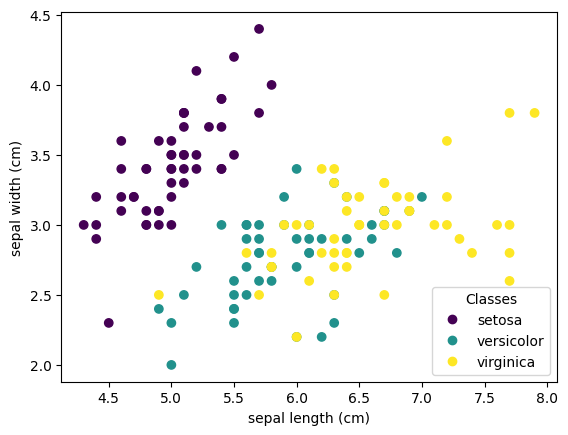

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [3]:
# Bài 1b
# 'setosa', 'versicolor', 'virginica'
iris_type = [0, 1, 2]

for t in iris_type:
    data_sort = sorted(iris.data[iris.target == t][:,0],reverse=True)
    print(f"{iris.target_names[t]}: {data_sort[:10]}")



setosa: [5.8, 5.7, 5.7, 5.5, 5.5, 5.4, 5.4, 5.4, 5.4, 5.4]
versicolor: [7.0, 6.9, 6.8, 6.7, 6.7, 6.7, 6.6, 6.6, 6.5, 6.4]
virginica: [7.9, 7.7, 7.7, 7.7, 7.7, 7.6, 7.4, 7.3, 7.2, 7.2]


In [4]:
# Bài 2b
iris_sum = iris.data[:,0] + iris.data[:,1]
iris_sum_top_50_idx = np.argsort(-iris_sum)[:50]

iris_sum_top_50 = iris.target[iris_sum_top_50_idx]
for t in iris_type:
    print(f"{iris.target_names[t]}: {np.sum(iris_sum_top_50 == t)}")


setosa: 7
versicolor: 13
virginica: 30


In [7]:
# Bài 3b
from numpy.linalg import norm

sepal_length = float(input("Input sepal length: "))
sepal_width = float(input("Input sepal width: "))

def nearest_neightbor(input):
    dist = norm(input - iris.data[:,:2], axis=1)
    sorted_dist_idx = np.argsort(dist)
    dist_sorted = dist[sorted_dist_idx]
    target_sorted = iris.target[sorted_dist_idx]

    for i in range(len(target_sorted)-1):
        if abs(dist_sorted[i] - dist_sorted[i+1]) > 0.000001:
            return f"a) This sample belongs to class {iris.target_names[target_sorted[i]]}"
        if target_sorted[i] != target_sorted[i+1]:
            return f"a) This sample belongs to class {iris.target_names[target_sorted[i+1]]}"

def k_nearest_neighbor(k, input):
    dist = norm(input - iris.data[:,:2], axis=1)
    sorted_dist_idx = np.argsort(dist)
    
    top_k_idx = sorted_dist_idx[:k]
    top_k_target = iris.target[top_k_idx]
    vote = np.zeros(3)
    for t in iris_type:
        vote[t] = np.sum(top_k_target == t)
    
    if np.sum(vote == np.max(vote)) == 1:
        return f"b) This sample belongs to class {iris.target_names[top_k_target[0]]}"
    return f"b) This sample doesn't belong to any class"
        

def nearest_neightbor_circle(input):
    dist = norm(input - iris.data[:,:2], axis=1)
    # in_circle_dist = dist[dist <= 2]
    in_circle_target = iris.target[dist <= 0.2]
    vote = np.zeros(3)
    for t in iris_type:
        vote[t] = np.sum(in_circle_target == t)
    print(vote)
    if np.sum(vote == np.max(vote)) == 1:
        return f"c) This sample belongs to class {iris.target_names[in_circle_target[0]]}"
    return f"c) This sample doesn't belong to any class" 

# sepal_length = 6.5
# sepal_width = 3
new_data = np.array([sepal_length, sepal_width])
# a
print(nearest_neightbor(new_data))
# b
print(k_nearest_neighbor(7, new_data))
# c
print(nearest_neightbor_circle(new_data))

    

a) This sample belongs to class virginica
b) This sample belongs to class versicolor
[0. 2. 4.]
c) This sample belongs to class versicolor


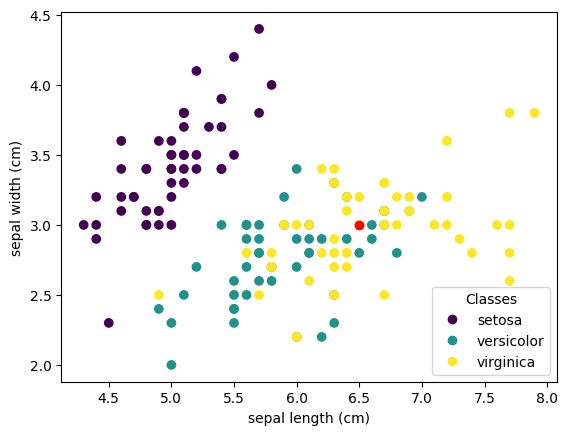

In [112]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.scatter(sepal_length, sepal_width, c='red')

